# Modelling – Logistic Regression

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score

In [90]:
people = pd.read_csv("labeled_data_with_metrics.csv")
people = people.drop(columns= "Unnamed: 0", axis=1)
people

,distinct_id,locationSetting,notificationSettings,active_timespan,US,Facebook,Foodie,Google,Unknown,num_sessions,...,commentAdded,commentLength,churned,number_ratings,SQS,avg_session_duration,time_delta_slope,session_time_slope,time_delta_slope_90,session_time_slope_90
0,00000000-0000-0000-0000-000000000000,1,0,24.202130,0,0,1,0,0,2,...,0,0.000000,1,0.0,-1.000000,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
1,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,1,1,1.130949,1,0,0,1,1,97,...,0,0.000000,0,1.0,40.181818,82.854545,1.113364e+03,6.302727,0.000000e+00,0.000000
2,001210DC-54C8-43AD-B295-148F47818391,1,0,7.158310,1,0,0,1,1,61,...,0,0.000000,0,0.0,20.000000,47.940000,-1.171600e+04,6.667879,0.000000e+00,0.000000
3,0019C3B9-FA62-4AB4-A895-1390A1FA818C,1,1,0.000000,1,0,1,0,0,1,...,0,0.000000,0,0.0,-1.000000,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
4,0025A8A4-2590-4ECA-8CE8-419D710AE46F,1,0,113.687361,1,0,1,0,1,64,...,0,0.000000,0,1.0,27.375000,177.325000,6.155496e+05,-41.476190,-9.127842e+06,6.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7210,wandaandreu@gmail.com_5053,1,0,188.791597,1,0,1,0,1,5,...,0,0.000000,0,0.0,1.666667,54.700000,1.371636e+07,-44.650000,0.000000e+00,0.000000
7211,willwojt@gmail.com_6868,1,0,37.992164,1,0,1,0,1,178,...,5,2.252809,0,7.0,4.171717,61.190909,-1.221786e+02,0.021697,-1.221786e+02,0.021697
7212,wolphramite@gmail.com_291,1,0,79.125498,1,0,1,0,1,4,...,0,0.000000,1,0.0,1.000000,17.500000,0.000000e+00,0.000000,0.000000e+00,0.000000
7213,xbarbarazhong@gmail.com_6704,1,0,0.584016,1,0,1,0,1,21,...,0,0.000000,1,0.0,42.000000,124.150000,0.000000e+00,132.500000,0.000000e+00,0.000000


In [3]:
people.columns

Index(['distinct_id', 'locationSetting', 'notificationSettings',
       'active_timespan', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown',
       'num_sessions', 'sessions_per_day', 'America/New_York',
       'America/Los_Angeles', 'America/Chicago', 'Asia/Kolkata',
       'America/Denver', 'other_timezone', 'commentAdded', 'commentLength',
       'churned', 'number_ratings', 'SQS', 'avg_session_duration',
       'time_delta_slope', 'session_time_slope', 'time_delta_slope_90',
       'session_time_slope_90'],
      dtype='object')

In [64]:
train, test = train_test_split(people.drop(columns=['distinct_id', 'active_timespan', 'sessions_per_day'], axis=1), test_size=0.3, random_state=42)


In [65]:
Y_test = test['churned'].to_numpy()
X_test = test.drop(columns='churned', axis=1).to_numpy()

In [66]:
Y_train = train['churned'].to_numpy()
X_train = train.drop(columns='churned', axis=1).to_numpy()

In [67]:
lr_model = LogisticRegression()

In [68]:
lr_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions = lr_model.predict(X_train)

In [70]:
acc = accuracy_score(Y_train, predictions)
acc

0.6196039603960396

# Distinguishing features

In [73]:
train_qual = train[['locationSetting', 'notificationSettings', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown', 
                    'America/New_York',
       'America/Los_Angeles', 'America/Chicago', 'Asia/Kolkata',
       'America/Denver', 'other_timezone',
       'churned']]
train_quant = train[[
       'num_sessions', 'commentAdded', 'commentLength',
       'churned', 'number_ratings', 'SQS', 'avg_session_duration',
       'time_delta_slope', 'session_time_slope', 'time_delta_slope_90',
       'session_time_slope_90']]

In [74]:
train_qual.groupby("churned").mean()

,locationSetting,notificationSettings,US,Facebook,Foodie,Google,Unknown,America/New_York,America/Los_Angeles,America/Chicago,Asia/Kolkata,America/Denver,other_timezone
churned,,,,,,,,,,,,,
0,0.953168,0.408107,0.926407,0.071232,0.88351,0.045258,0.519481,0.223534,0.118457,0.110193,0.025187,0.004329,0.518300
1,0.953368,0.412914,0.719012,0.062575,0.90275,0.034675,0.855719,0.311678,0.143483,0.133918,0.190913,0.007971,0.212037


In [75]:
train_quant.groupby("churned").mean()

,num_sessions,commentAdded,commentLength,number_ratings,SQS,avg_session_duration,time_delta_slope,session_time_slope,time_delta_slope_90,session_time_slope_90
churned,,,,,,,,,,
0,44.833137,0.434081,0.14766,0.737111,10.925693,38.399466,110576.662448,3.972909,-161322.700427,0.719431
1,7.630132,0.000797,0.00444,0.002790,6.651161,52.902309,43974.925495,11.031392,-7618.116264,8.544453


In [104]:
useful = ['churned', 'num_sessions',
          'commentAdded', 'commentLength', 'number_ratings', 'time_delta_slope', 
          'session_time_slope', 'time_delta_slope_90', 'session_time_slope_90',]
useful2 = ['churned', 'SQS', 'avg_session_duration', 'Unknown', 'time_delta_slope',
       'session_time_slope','US']


# Retraining Model

In [105]:
train2 = train[useful]

In [106]:
Y_train2 = train2['churned'].to_numpy()
X_train2 = train2.drop(columns='churned', axis=1).to_numpy()


In [107]:
lr_model2 = LogisticRegression(solver="lbfgs")

In [108]:
lr_model2.fit(X_train2, Y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
predictions2 = lr_model2.predict(X_train2)

In [110]:
acc = accuracy_score(Y_train2, predictions2)
acc

0.5089108910891089

(0.0, 1.0)

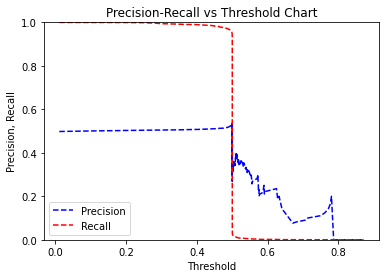

In [96]:
pred_y=lr_model2.predict(X_train2) 

probs_y=lr_model2.predict_proba(X_train2) 

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Y_train, probs_y[:, 
1]) 

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])